<a href="https://colab.research.google.com/github/Fafasungrass/Backset_estimator/blob/main/At%20Work%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Index(['Fermenter pH', 'Backset Added', 'Post-backset pH', 'Conversion pH'], dtype='object')
Enter the Fermenter pH: 3.98


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Given a fermenter pH of 3.98, add 957 gallons of backset
Based on data collected as of date
Mean Squared Error: 4021.331289571202
R-Squared: 0.7610124521661746
Root Mean Squared Error: 63.413967622056276


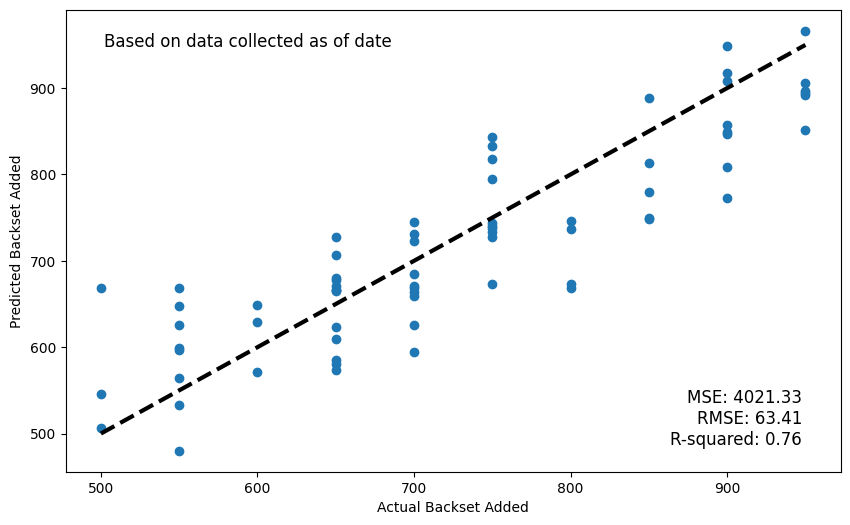

In [3]:
# Linear Regression Model
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load your data
# Replace this with actual loading of your data
data = pd.read_csv(r"/D1 Infection Analysis csv.csv")  # replace "your_data.csv" with your actual csv file path
update_date = "date"
# Remove rows with NaNs
data = data.dropna()
print(data.columns)
# Convert columns with numbers represented as strings to float (if necessary)
data['Backset Added'] = data['Backset Added'].str.replace(',', '').astype(float)

# Uncomment the next line if 'Backset Added' is not already a float
# data['Backset Added'] = data['Backset Added'].str.replace(',', '').astype(float)

# Split the data into training set and test set
X = data[['Fermenter pH', 'Post-backset pH']]  # Add other columns if required
y = data['Backset Added']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Ask for user input
fermenter_pH = float(input("Enter the Fermenter pH: "))

# Define the desired Post-backset pH
desired_post_backset_pH = 4.90

# Predicting the amount of backset to add for a given fermenter pH and desired Post-backset pH
given_values = [fermenter_pH, desired_post_backset_pH]
predicted_backset = model.predict([given_values])
print(f"Given a fermenter pH of {fermenter_pH}, add {round(predicted_backset[0])} gallons of backset")
print(f"Based on data collected as of {update_date}")

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-Squared:', r2_score(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

# Visualizing the model's predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.text(0.95, 0.05, f"MSE: {mse:.2f}\nRMSE: {rmse:.2f}\nR-squared: {r2:.2f}",
         horizontalalignment='right', verticalalignment='bottom',
         transform=plt.gca().transAxes, fontsize=12)
plt.text(0.05, 0.95, f"Based on data collected as of {update_date}",
         horizontalalignment='left', verticalalignment='top',
         transform=plt.gca().transAxes, fontsize=12)
plt.xlabel('Actual Backset Added')
plt.ylabel('Predicted Backset Added')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.show()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored